<a href="https://colab.research.google.com/github/TRANDY-116/Stock-Market-Analysis/blob/main/Stock_markets_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install the main library YFinance
!pip install yfinance

In [ ]:
# Imports of library
import pandas as pd
import numpy as np

#Financial Data Sources
import yfinance as yf
import pandas_datareader as pdr

#data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

Understanding Data-Driven Decisions data pulls

In [ ]:
end = date.today()
print(f'Year = {end.year}; month = {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')



Year = 2025; month = 6; day=6
Period for indexes: 1955-06-06 to 2025-06-06 


1.1 GDP

In [ ]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of chained 2012 Dollars, Quarterly
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT","fred",start=start)

In [ ]:
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(15)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2021-10-01,21606.08076,0.020390,0.005260
2022-01-01,21722.02480,0.020882,0.005366
2022-04-01,21840.56636,0.021403,0.005457
2022-07-01,21961.53508,0.021799,0.005539
2022-10-01,22084.92536,0.022162,0.005618
2023-01-01,22208.24254,0.022384,0.005584
2023-04-01,22333.11239,0.022552,0.005623
2023-07-01,22459.74068,0.022685,0.005670
2023-10-01,22588.18459,0.022787,0.005719


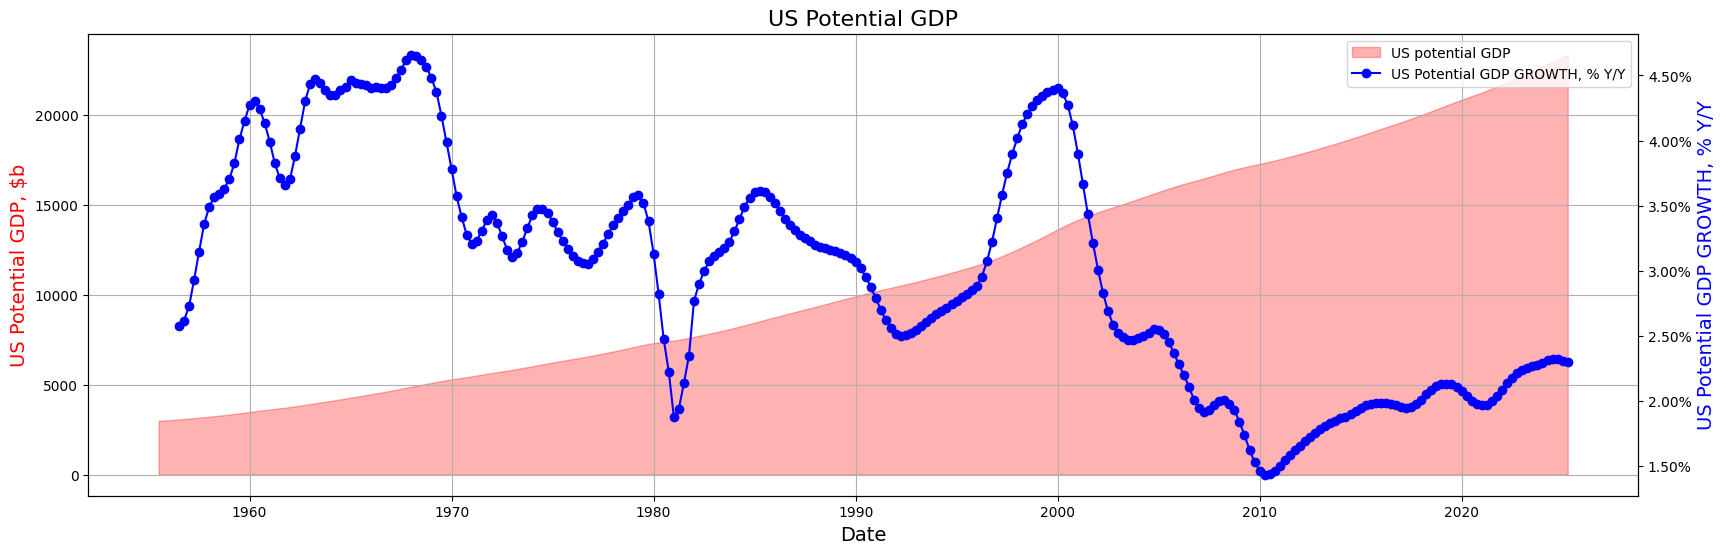

In [ ]:
# visualising GDPPOT
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20,6))
plt.grid(True)

# plotting area under the potential GDP curve
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US potential GDP")

# creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP GROWTH, % Y/Y")

# setting labels & title
ax.set_xlabel("Date", fontsize =14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize =14)
ax2.set_ylabel("US Potential GDP GROWTH, % Y/Y", color="blue", fontsize =14)
ax.set_title("US Potential GDP", fontsize =16)

# adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.show()

**1.2 Inflation - CPI CORE**

In [ ]:
# "Core CPI Index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for all Urban consumers" All items less food and Energy
# it is an aggregate of prices paid by urban consumbers for a typical basket of goods, excluding food and energy.
# This measurement, know as "Core CPI", is widely used by economists because food and energy have very volatile prices
cpilfesl = pdr.DataReader("CPILFESL","fred",start=start)

In [ ]:

cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2024-04-01,317.596,0.036236,0.002633
2024-05-01,318.053,0.033905,0.001439
2024-06-01,318.343,0.032606,0.000912
2024-07-01,318.933,0.032283,0.001853
2024-08-01,319.839,0.032918,0.002841
2024-09-01,320.835,0.032899,0.003114
2024-10-01,321.688,0.032928,0.002659
2024-11-01,322.619,0.032801,0.002894
2024-12-01,323.296,0.032136,0.002098


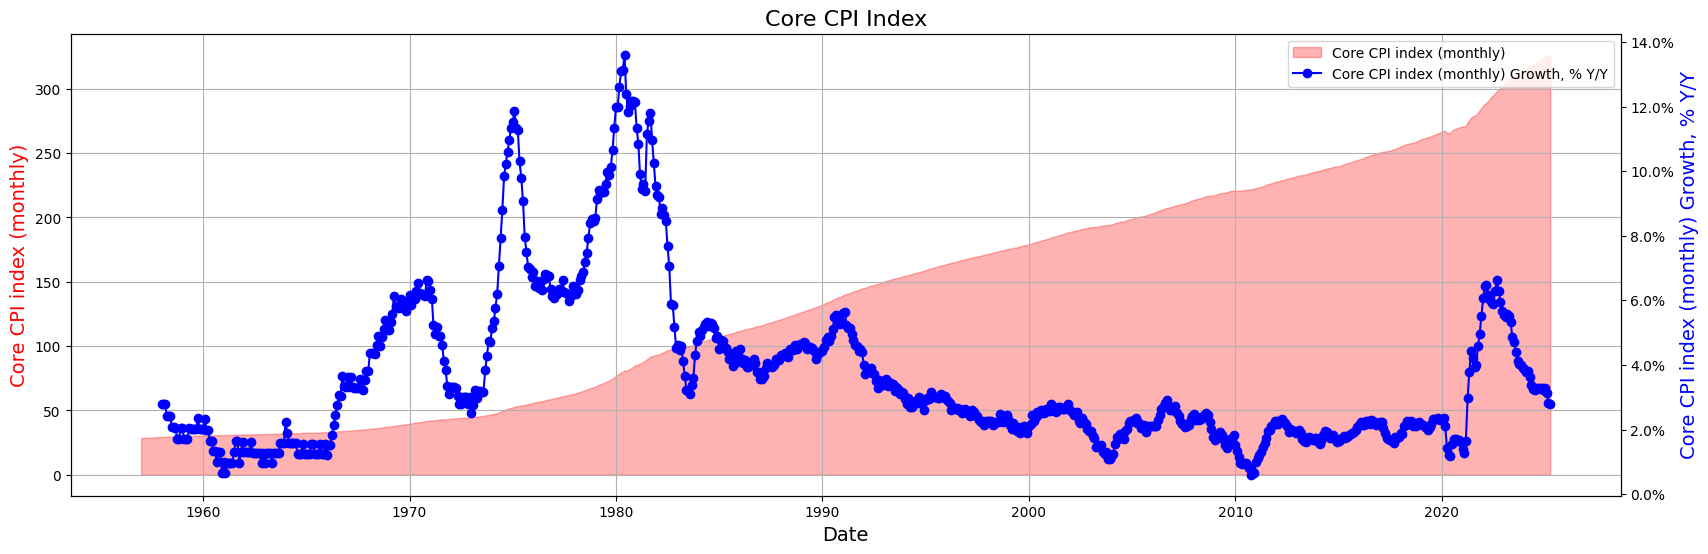

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
plt.grid(True)

# plotting area under the potential GDP curve
ax.fill_between(cpilfesl.index, cpilfesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpilfesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y")

# setting labels and titles
ax.set_xlabel("Date", fontsize =14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize =14)
ax2.set_ylabel("Core CPI index (monthly) Growth, % Y/Y", color="blue", fontsize =14)
ax.set_title("Core CPI Index", fontsize =16)

# adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.show()


1.3 INTEREST RATES  

In [ ]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(10)

,FEDFUNDS
DATE,
2024-08-01,5.33
2024-09-01,5.13
2024-10-01,4.83
2024-11-01,4.64
2024-12-01,4.48
2025-01-01,4.33
2025-02-01,4.33
2025-03-01,4.33
2025-04-01,4.33


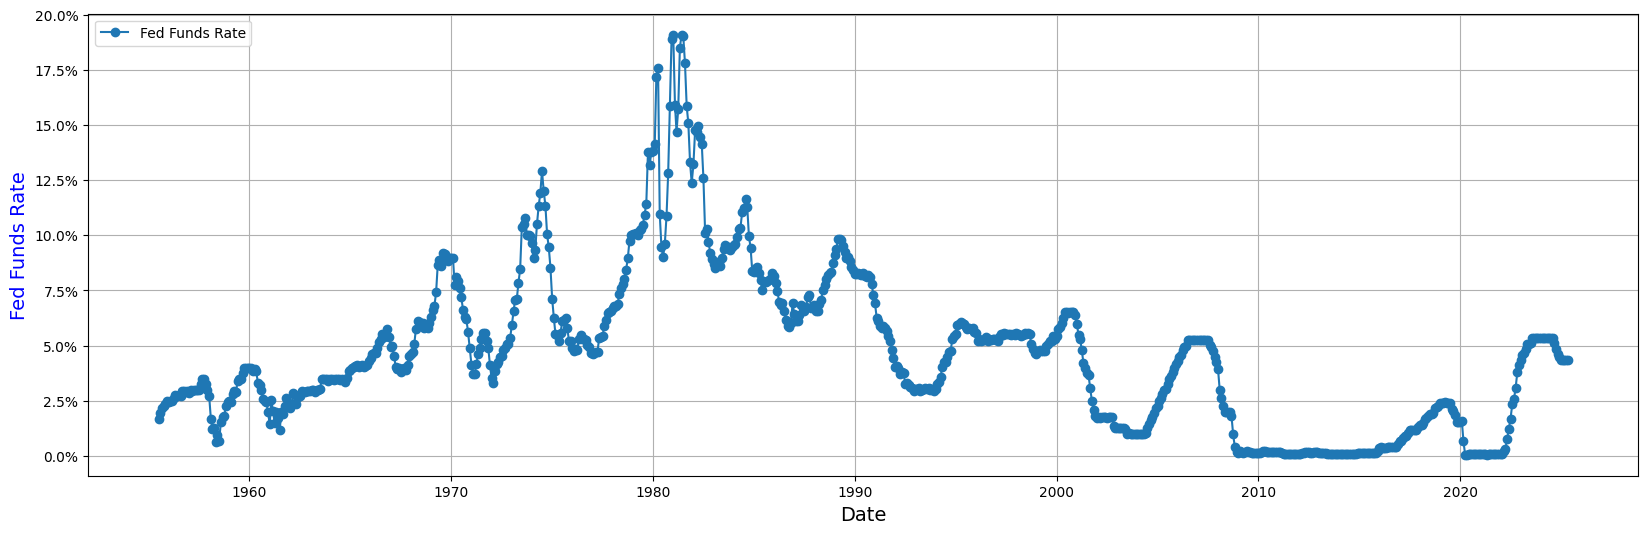

In [ ]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
# ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(fedfunds.index, fedfunds.FEDFUNDS/100, marker="o", label="Fed Funds Rate")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

plt.show()


In [ ]:

# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail()

,DGS1
DATE,
2025-05-29,4.13
2025-05-30,4.11
2025-06-02,4.12
2025-06-03,4.12
2025-06-04,4.06


Other rates for US Treasury: https://fred.stlouisfed.org/categories/115

https://fred.stlouisfed.org/series/DGS2

https://fred.stlouisfed.org/series/DGS3

https://fred.stlouisfed.org/series/DGS5

https://fred.stlouisfed.org/series/DGS10 ...

In [ ]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail()

,DGS5
DATE,
2025-05-29,4.00
2025-05-30,3.96
2025-06-02,4.01
2025-06-03,4.04
2025-06-04,3.93


1.4 SNP500

In [ ]:
# Other indexes: https://stooq.com/t/

# SPX= S&P500
spx_index = pdr.get_data_stooq('^SPX', start, end)
spx_index.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-06-05,5985.67,5999.70,5921.20,5939.30,3.127316e+09
2025-06-04,5978.94,5990.48,5966.11,5970.81,2.682443e+09
2025-06-03,5938.56,5981.35,5929.00,5970.37,2.995304e+09
2025-06-02,5896.68,5937.40,5861.43,5935.94,2.765358e+09
2025-05-30,5903.67,5922.14,5843.66,5911.69,4.815798e+09


In [ ]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
spx_index['spx_dod'] = (spx_index.Close/spx_index.Close.shift(-1)-1)
spx_index['spx_qoq'] = (spx_index.Close/spx_index.Close.shift(-63)-1)
spx_index['spx_yoy'] = (spx_index.Close/spx_index.Close.shift(-252)-1)

In [ ]:
spx_index.head()

,Open,High,Low,Close,Volume,spx_dod,spx_qoq,spx_yoy
Date,,,,,,,,
2025-06-05,5985.67,5999.70,5921.20,5939.30,3.127316e+09,-0.005277,0.034988,0.124144
2025-06-04,5978.94,5990.48,5966.11,5970.81,2.682443e+09,0.000074,0.021939,0.131369
2025-06-03,5938.56,5981.35,5929.00,5970.37,2.995304e+09,0.005800,0.033267,0.140367
2025-06-02,5896.68,5937.40,5861.43,5935.94,2.765358e+09,0.004102,0.014739,0.127017
2025-05-30,5903.67,5922.14,5843.66,5911.69,4.815798e+09,-0.000081,-0.007190,0.114144


In [ ]:
spx_truncated = spx_index[spx_index.index>='1990-01-01']

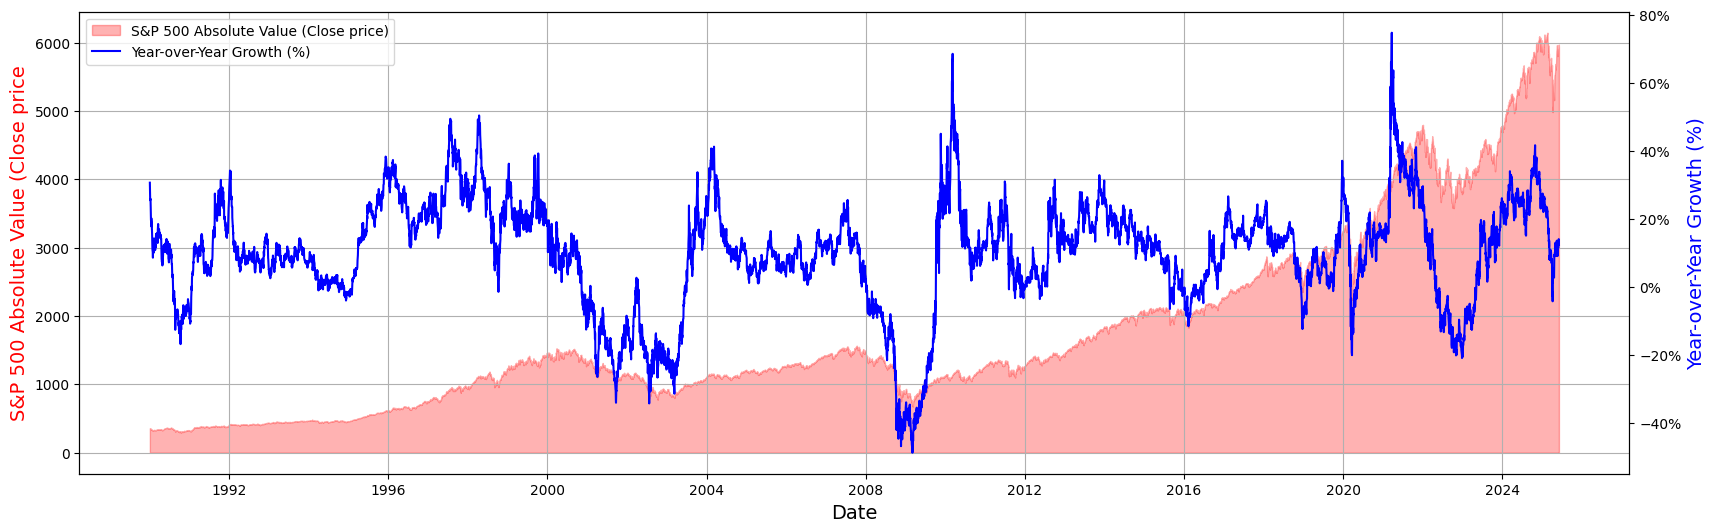

In [ ]:
# S&P500 abs. vs. relative growth
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(spx_truncated.index, spx_truncated.Close, color="red", alpha=0.3, label="S&P 500 Absolute Value (Close price)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(spx_truncated.spx_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth (%)")

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("S&P 500 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()